# Boxplt

In [2]:
x = [30,63,66,78,82,96,106,270]
y = [64,82,88,90,96,108,128,166]

鍾樂水 = x
朱碧石 = y

In [3]:
#Boxplot:五個數

print("鍾樂水：", "min=", min(x), ",", "Q1=", sum(x)/4, ",", "Median=", sum(x)/2, ",", "Q3=", sum(x)/4*3, ",", "Max=", max(x))
print("朱碧石：", "min=", min(y), ",", "Q1=", sum(y)/4, ",", "Median=", sum(y)/2, ",", "Q3=", sum(y)/4*3, ",", "Max=", max(y))

鍾樂水： min= 30 , Q1= 197.75 , Median= 395.5 , Q3= 593.25 , Max= 270
朱碧石： min= 64 , Q1= 205.5 , Median= 411.0 , Q3= 616.5 , Max= 166


# 資料處理練習

In [1]:
import pandas as pd

#define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

#loading training data
df = pd.read_csv('iris.csv', header=None, names=names) #header=None:沒有標題

In [5]:
#observing the data

df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns #matplotlib的補強，以matplotlib建構的高階繪圖套件

plt.style.use('ggplot') #ggplot:佈景主題
                        #plt.style.use():指定主題

#花萼的長、寬
sns.lmplot("sepal_length", "sepal_width", data=df, fit_reg=False, hue='class') #fit_reg:迴歸線
                                                                                 #hue:定義數據子集(分類)

In [9]:
print(plt.style.available) #印出所有可用的內建風格

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


[參考](https://zhuanlan.zhihu.com/p/25909753)

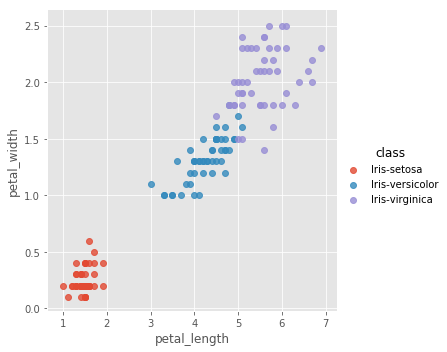

In [10]:
##花瓣的長、寬
sns.lmplot("petal_length", "petal_width", data=df, fit_reg=False, hue='class')

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
##區分train、test (train_test_split)

#loading libraries
import numpy as np
from sklearn.model_selection import train_test_split

#create design matrix x and target vector y
## 將資料格式從dataframe轉為array
#iloc:取哪個欄位 [row,col]
#[].values 轉成array
x = df.iloc[:,:-1].values #擷取class以外的data
y = df.iloc[:,4].values #擷取class

#x,y兩個都各分成train、test(相同的隨機分配方式)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)  #test_size:切的大小
                                                                                            #random_state:限制隨機抽取的方式
    #PRG(Pseudo-random- Generator):偽隨機數生成器

In [13]:
a = [1,2,3,4,5,6,7,8,9,10]
print(a[:]) #全部
print(a[:-1])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


---

# loc & iloc 選取特定行列

- loc[ , ]    #根據資料"**具體標籤**"選取行列

- iloc[ , ]   #根據資料"**所在位置**"選取行列，從0開始計數
        #[a,b]:從a到b，不包刮b  e.g.[:-1]:從頭到倒數第二個(不包含倒數第一)

---

In [14]:
##選擇演算法：K-NN(k-nearest neighbor classifier)


#instantiate learning model (k=3)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) #周圍3個數


#fitting the model將train放入模型中
    #x為花萼花瓣資料，y為類別
knn.fit(x_train, y_train)


#predict the response用test作預測
    #訓練好之後(x,y對應建造成的模型)，用x_test去預測對應的y
pred = knn.predict(x_test)


#evaluate accuracy計算準確度
    #把x_test預測出的結果(pred)，和y_test比較，看預測的準確度
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)
    #accuracy_score(y_true, y_pred)

0.98

[sklearn.neighbors KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[sklearn.metrics 評估方法](https://blog.csdn.net/CherDW/article/details/55813071)

In [39]:
##調整參數

from sklearn.model_selection import cross_val_score

#cross-validation交叉驗證 (usually基數)
scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy') #cv:分為幾組
                                                                           #scoring='accuracy:方法，一種顯示準確度高不高的方法
print(scores)
print(scores.mean())

[0.86666667 0.93333333 0.93333333 0.93333333 1.         0.86666667
 0.93333333 0.93333333 1.         1.        ]
0.9400000000000001


In [40]:
##練習
#比較k=1、3、...、49的結果

neighbors =[x for x in range(1,50,2)]
# neighbors = [x for x in range(1,50) if x%2 != 0]

print(neighbors)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [44]:
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

print(cv_scores) #準確度

#changing to misclassification error分類錯誤
MSE = [1-x for x in cv_scores]
print(MSE) #均方誤差：預測值與真實值之間差異的均方值(大小)

[0.96, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9666666666666666, 0.9733333333333334, 0.9666666666666666, 0.9666666666666666, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9333333333333333, 0.9333333333333333, 0.9400000000000001]
[0.040000000000000036, 0.03333333333333344, 0.033333333333333215, 0.033333333333333215, 0.026666666666666616, 0.033333333333333215, 0.019999999999999907, 0.026666666666666616, 0.026666666666666616, 0.026666666666666616, 0.03333333333333344, 0.026666666666666616, 0.03333333333333344, 0.03333333333333344, 0.046666666666666634, 0.053333333333333344, 0.053333333333333344, 0.053333333333333344, 0.053333333333333344, 0.046666666666666634, 0.046666666666666634, 0.053333333333333344, 0.06666666666666665, 0.066666666

[MSE介紹](https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8-%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-%E5%9F%BA%E7%A4%8E%E4%BB%8B%E7%B4%B9-%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8-loss-function-2dcac5ebb6cb)

In [42]:
#determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
    #index(x, start, end):列表中第一個匹配的值
    #x:查找的對象
    #start, end:開始結束的範圍
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 7


In [20]:
#格式化操作

print("I'm %s. I'm %d years old." % ("kid", 18))
print("Hi, %s. I'm %s" % ('mom', 'kid'))

# %s:字符串
# %d:十進位制整數

    #https://www.cnblogs.com/vamei/archive/2013/03/12/2954938.html

I'm kid. I'm 18 years old.
Hi, mom. I'm kid


Text(0, 0.5, 'Misclassification Error')

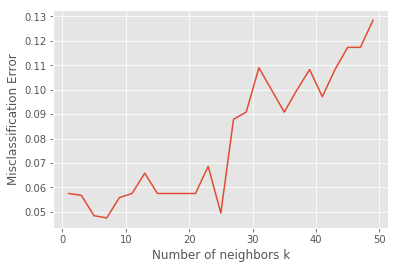

In [43]:
#plot misclassification error vs. k
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors k')
plt.ylabel('Misclassification Error')

---

# 資料預處理_資料清理：遺失值

Machine learning的model是利用"空間中的距離"來做回歸或是分類，因此如果有缺值，就無法在空間中表現出位置，所以要處理

In [14]:
import pandas as pd

df = pd.read_csv('data.csv')
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [47]:
##遺漏值

df.isnull() #是否空值

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [48]:
df.isnull().sum() #總合

A    0
B    0
C    1
D    1
dtype: int64

In [54]:
##刪除

df.dropna(axis=0) #axis=0:row(沿著row方向依序刪除)
                  #預設，一般處理missing value不太會將整筆資料刪除

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [50]:
df.dropna(axis=1) #axis=1:column (沿著column方向依序刪除)

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [51]:
df.dropna(how='all') #全部為空值時，才會刪除

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [52]:
df.fillna(0) #補上固定值

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,0.0,8.0
2,0.0,11.0,12.0,0.0


In [55]:
df1 = df
df1['C'] = df1['C'].fillna(df['C'].mean()) #在C的missing value補上C的mean
df1

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,0.0,11.0,12.0,NaN


---

# axis=0 VS. axis=1

動作方向的副詞

- axis=0：跨行(down) → 使用0值表示沿著每一row或行標籤索引值向下執行方法
- axis=1：跨列(across) → 使用1值表示每一col或列標籤向執行對應方法

---

In [58]:
df.dropna(subset=['C']) #特定特徵有遺漏值的樣本
                        #刪掉C內有missing value的row

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,0.0,11.0,12.0,NaN


In [2]:
##填補遺漏值

from sklearn.preprocessing import Imputer

##方法
#平均數
imr = Imputer(missing_values='NaN', strategy = 'mean', axis=0) #資料差補(方法)
                                                               #median:中位數
                                                               #most_frequent:眾數
    #missing_values:告訴它missing value長怎樣 (預設'NaN')
    #axis=0:用col去算平均值
    
##求值    
imr = imr.fit(df.values) #df:data.frame
                         #df.value:array
    #fit():求得訓練集的平均值、標準差、最大、最小...等，訓練的過程
imputed_data = imr.transform(df.values)
imputed_data

C:\Users\vanik\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [ 0. , 11. , 12. ,  6. ]])

In [12]:
#測試
df = df.fillna(0)

imr = Imputer(missing_values=6, strategy = 'mean', axis=0) #6：遺失值表示符
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

C:\Users\vanik\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6.5,  0. ,  8. ],
       [ 0. , 11. , 12. ,  0. ]])

---

# fit() VS. transform() VS. fit_transform()

- fit():一個訓練過程，求得訓練集的平均值、標準差、最大、最小....等，訓練集固有的屬性


- transform():在fit的基礎上，進行標準化、降維、歸一化...等操作
    - 因為建立在fit之上，直接執行會出錯


- fit_transform():結合fit跟transform
    - 在fit_transfrom(trainData)後，應使用transform(testData)，雖使用fit_transform(testData)也能使數據進行標準化、歸一化，但兩個結果不是在同一個"標準"下


---

In [15]:
##方法
#眾數：若無重複，用最小值補
imr = Imputer(missing_values='NaN', strategy = 'most_frequent', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

C:\Users\vanik\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  3.,  8.],
       [ 0., 11., 12.,  4.]])

In [18]:
help('imputer') #查說明文件

No Python documentation found for 'imputer'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



# 資料預處理_資料轉換：非數值型

In [2]:
import numpy as np
import pandas as pd

In [13]:
##演算法：僅可處理數值型資料

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
    #color:類別型
    #size:順序型
    #price:數值型
    #classlabel:目標變數
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [14]:
##順序型 → 數值型
#定義對應字典(mapping dictionary)，進行轉換

size_mapping = {'XL':3, 'L':2, 'M':1}

df['size'] = df['size'].map(size_mapping) #map():對物件內每個元素做處理
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [191]:
#將數值型轉回原始字串(文字標籤)
#返回:value:key

#for第一個變數：字典的key
#   第二個變數：對應的value 
inv_size_mapping = {v:k for k, v in size_mapping.items()} #items():返回字典tuple對應的列表
df['size'] = df['size'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [126]:
size_mapping.items()

dict_items([('XL', 3), ('L', 2), ('M', 1)])

In [133]:
inv_size_mapping

{3: 'XL', 2: 'L', 1: 'M'}

In [160]:
##類別型 → 數值型
#重複值機率高，先挑出unique的值

#Method1:定義對應字典
#使用enumerate():產生(key,value)的tuple (key=index, value=class)
import numpy as np

#for第一個變數：value
#   第二個變數：key
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))} #unique(x):在np中，去除重複的元素，返回由小到大的列表
class_mapping

df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


---

In [78]:
np.unique(df[['classlabel', 'size', 'color']])

array(['L', 'M', 'XL', 'blue', 'class1', 'class2', 'green', 'red'],
      dtype=object)

In [83]:
np.unique(df['price']) #若將float與str放在一起，會出現錯誤

array([10.1, 13.5, 15.3])

In [73]:
list(enumerate(np.unique(df['classlabel'])))

[(0, 'class1'), (1, 'class2')]

In [71]:
for idx, label in enumerate(np.unique(df['classlabel'])):
    print('{}:{}'.format(label, idx))

class1:0
class2:1


---

In [161]:
#class反向的轉回去

inv_class_mapping = {v:k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [136]:
class_mapping.items()

dict_items([('class1', 0), ('class2', 1)])

In [137]:
inv_class_mapping

{0: 'class1', 1: 'class2'}

---

# np.unique()

In [99]:
##A = np.unique(a)
#去除重複的元素，返回由小到大的列表

a = [1,6,43,7,7,7,1,2,4,6]
A = np.unique(a)
A

array([ 1,  2,  4,  6,  7, 43])

In [105]:
##A, i = np.unique(A, return_index=True)
#返回新列表元素在舊列表中的位置，並以列表儲存在i中

A, i = np.unique(a, return_index=True)
A


array([ 1,  2,  4,  6,  7, 43])

In [106]:
i

array([0, 7, 8, 1, 3, 2], dtype=int64)

---

In [15]:
##類別型 → 數值型

#Method2：LabelEncoder類別(不須特別去定義)
#訓練模型去做轉換
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
df['classlabel'] = class_le.fit_transform(df['classlabel'].values)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [6]:
#轉回原來的類別
df['classlabel'] = class_le.inverse_transform(df['classlabel'])
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


[source](https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87)

In [7]:
##名目特徵 → 數值型

#Method1：LabelEncoder，不優，名目特徵本身無大小之分
#labelEncoder：把每個類別 mapping到某個整數，不會增加新欄位

X = df[['color', 'size', 'price']].values #df.[[]]:多個欄位

color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0]) #X[:,0]:第一欄的所有值
df['color'] = X
df
#blue=0, green=1, red=2 → 0,1,2有大小之分，但名目特徵本身無

,color,size,price,classlabel
0,1,1,10.1,class1
1,2,2,13.5,class2
2,0,3,15.3,class1


In [10]:
##Method2：one-hot encoding將每個值轉為一個新的虛擬特徵
#:One-hot- encoding：為每個類別新增一個欄位，用0/1表示是否

#Method2-1：利用OneHotEncoder(可轉換數字、文字)

from sklearn.preprocessing import OneHotEncoder
#OneHotEncoder在sklearn套件中出來會是array

ohe = OneHotEncoder(categorical_features=[0]) #categorical_features=[0]:表示欲在data上執行One hot encoding的index為0
#One hot encoding無法直接對字串進行編碼，必須先透過Label encoding將字串以數字取代後再進行One hot encoding處裡(所以帶fit_transform(X))
temp = ohe.fit_transform(X).toarray() #toarray():轉array
    #OneHotEncoder的output是scipy.csr_matrix所以要再轉成array
print(ohe.fit_transform(X))
print(temp)
dff = pd.DataFrame(temp)    
dff
##註：OneHotEncoder的input要是2-D array(表)； Label encoding為1-D array(欄)

  (0, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
  (0, 3)	1.0
  (0, 4)	10.1
  (1, 3)	2.0
  (1, 4)	13.5
  (2, 3)	3.0
  (2, 4)	15.3
[[ 0.   1.   0.   1.  10.1]
 [ 0.   0.   1.   2.  13.5]
 [ 1.   0.   0.   3.  15.3]]


C:\Users\vanik\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\vanik\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\vanik\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of in

,0,1,2,3,4
0,0.0,1.0,0.0,1.0,10.1
1,0.0,0.0,1.0,2.0,13.5
2,1.0,0.0,0.0,3.0,15.3


In [11]:
#不指定column，會將所有的值做轉換
ohe = OneHotEncoder()
temp = ohe.fit_transform(df).toarray()
dff = pd.DataFrame(temp)    
dff

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [16]:
#Method2-2：利用pandas套件(output is data.frame)

#get_dummies():可直接進行One hot encoding編碼
pd.get_dummies(df[['price', 'color', 'size']])
    #可直接轉字串，反而無法轉換數字
    #若無指定columns，資料會全部轉換
    #get_dummies會依據其變數名稱自動新增新行名

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [17]:
#Method2-3：利用pandas套件，並刪除相關的特徵行
#將一個特徵轉為三個特徵，但其彼此是有相關性的
#  e.g.用兩個特徵就可表達三個顏色 → 可刪除一個欄位

pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [18]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


- 有序離散值 → Label Encoding
- 無序離散值 → One Hot Encoding/Dummies

---

### pandas map()、apply()、applymap()

[pandas的map、apply、applymap](https://home.gamer.com.tw/creationDetail.php?sn=4219422)

In [48]:
ser = pd.Series([1,2,3,4,5])
ser

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [21]:
ser = pd.Series([1,2,3,4,5], index=['one', 'two', 'three', 'four', 'five'])
ser

one      1
two      2
three    3
four     4
five     5
dtype: int64

In [4]:
type(ser)

pandas.core.series.Series

In [5]:
ser.map(lambda x:x**2) #不改變原始資料

0     1
1     4
2     9
3    16
4    25
dtype: int64

In [8]:
ser.apply(lambda x:x**2)

0     1
1     4
2     9
3    16
4    25
dtype: int64

In [9]:
dic = {1:11, 2:21, 3:31, 5:51, 6:61}
ser.map(dic)

0    11.0
1    21.0
2    31.0
3     NaN
4    51.0
dtype: float64

In [49]:
ser_map = pd.Series(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
ser.map(ser_map)

0    B
1    C
2    D
3    E
4    F
dtype: object

In [50]:
ser = pd.Series([0,2,8,4,5])
ser.map(ser_map)
# ser

0      A
1      C
2    NaN
3      E
4      F
dtype: object

In [56]:
def f(x, m):
    return x**m

ser.apply(f, args=(3,))

0      0
1      8
2    512
3     64
4    125
dtype: int64

In [58]:
def f(x, m, a):
    return (x**m)+a

ser.apply(f, args=(3,1))

0      1
1      9
2    513
3     65
4    126
dtype: int64

In [27]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]])
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [32]:
df.apply(sum)

0    12
1    15
2    18
dtype: int64

In [59]:
df.sum()

0    12
1    15
2    18
dtype: int64

In [35]:
df.map(lambda x:x**2) #dataframe沒有map

AttributeError: 'DataFrame' object has no attribute 'map'

In [36]:
df.apply(lambda x:x-5)

,0,1,2
0,-4,-3,-2
1,-1,0,1
2,2,3,4


In [61]:
def ff(xs, n):
    return xs.sum() *n

df.apply(ff, args=(2,)) #按column

0    24
1    30
2    36
dtype: int64

In [39]:
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [41]:
import numpy as np

In [42]:
df.apply(np.sqrt) #平方根

,0,1,2
0,1.000000,1.414214,1.732051
1,2.000000,2.236068,2.449490
2,2.645751,2.828427,3.000000
